# 📊 Sales Data Analysis – Python (Pandas & Matplotlib)

## This notebook analyzes 12 months of electronics retail sales data to uncover trends in revenue, customer behavior, and product performance. The goal is to answer key business questions using data cleaning, exploratory analysis, and visualization.

In [1]:
import pandas as pd
import os

## 1. Data Loading & Initial Inspection

In [2]:
all_months_data = pd.DataFrame()
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_data/" + file)
    all_months_data = pd.concat([all_months_data, df]) 

all_months_data.to_csv("all_data.csv", index = False)

# Combine sales data from all monthly files into a single consolidated DataFrame.

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## 2. Data Cleaning

In [4]:
all_data = all_data.dropna(how = 'all')

##### Some Order date columns have the value Or(as 1st 2 characters instead of Month number). Filter them out

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

## 3. Feature Engineering

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [7]:
all_data[['Street', 'City', 'State_Zipcode']] = all_data['Purchase Address'].str.split(',', expand = True)
all_data[['State', 'Zipcode']] = all_data['State_Zipcode'].str.strip().str.split(' ', expand = True)
all_data['City'] = all_data['City'] + ' (' + all_data['State'] + ')'
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,State_Zipcode,State,Zipcode
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas (TX),TX 75001,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston (MA),MA 02215,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles (CA),CA 90001,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles (CA),CA 90001,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles (CA),CA 90001,CA,90001


In [8]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'],format='%m/%d/%y %H:%M')
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,State_Zipcode,State,Zipcode,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas (TX),TX 75001,TX,75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston (MA),MA 02215,MA,02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles (CA),CA 90001,CA,90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles (CA),CA 90001,CA,90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles (CA),CA 90001,CA,90001,9,27


## 4. Exploratory Data Analysis

### Question 1. What was the best month for sales? How much was earned that month?
### We aggregate monthly sales to identify seasonality and peak revenue periods.

##### Add month and sales column to calculate monthly sales

In [9]:
import matplotlib.pyplot as plt

In [10]:
results1 = all_data.groupby('Month').sum(numeric_only = True)
results1

,Quantity Ordered,Price Each,Sales,Hour,Minute
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


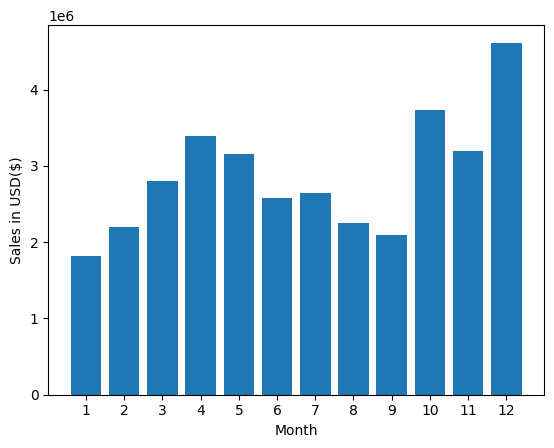

In [11]:
months = range(1,13)
plt.bar(months, results1['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month')
plt.show()

### Answer 1. Best Month for Sales
#### December recorded the highest sales, generating approximately $4.6 million in revenue.
#### This spike is likely driven by holiday-season demand and year-end purchasing behavior, making December a critical period for targeted promotions and inventory planning.

### Question 2. Which city had the highest amount of sales?

In [12]:
results2 = all_data.groupby('City').sum(numeric_only = True)['Sales']
results2

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Sales, dtype: float64

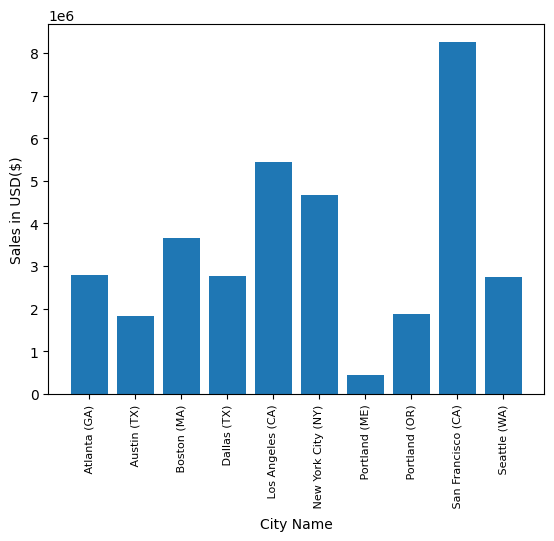

In [13]:
plt.bar(results2.index, results2.values)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.xticks(results2.index, rotation='vertical', size=8)
plt.show()

##### 2. Visualization for 2nd answer

### Answer 2.City with the Highest Sales

#### San Francisco emerged as the top-performing city, with total sales of approximately $8.2 million.
#### This suggests a combination of higher purchasing power, strong product demand, and possibly higher-priced item sales compared to other cities.

#### Question 3. What time should we display adverstisements to maximize likelihood of customer's buying products?

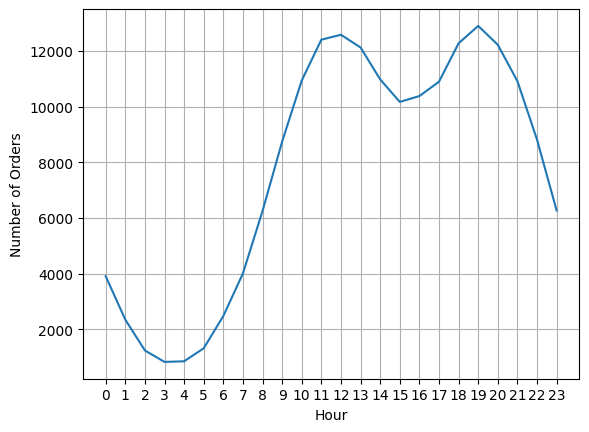

In [14]:
hours = [hour for hour, df in all_data.groupby('Hour')]

counts = all_data.groupby('Hour').size()

plt.plot(hours, counts)
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

#My recommendation is around 11am (11) or 7pm (19)

### Answer 3. Optimal Time for Advertising
#### Order volumes peak around 11 AM and 7 PM, indicating high customer activity during late mornings and early evenings.
#### Scheduling advertisements just before these time windows can maximize visibility and increase the likelihood of conversion.

#### Question 4: What products are most often sold together?

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,State_Zipcode,State,Zipcode,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas (TX),TX 75001,TX,75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston (MA),MA 02215,MA,02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles (CA),CA 90001,CA,90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles (CA),CA 90001,CA,90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles (CA),CA 90001,CA,90001,9,27


##### 4.a. Identify those orders in which more than one product has been ordered. (the duplicate order IDs)

In [16]:
repeated = all_data[all_data['Order ID'].duplicated(keep = False)].copy()
repeated.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,State_Zipcode,State,Zipcode,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles (CA),CA 90001,CA,90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles (CA),CA 90001,CA,90001,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles (CA),CA 90001,CA,90001,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles (CA),CA 90001,CA,90001,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston (MA),MA 02215,MA,02215,11,31


##### 4.b.Group the products which are in same order ID (Example - 176560 Google Phone, Wired Headphones)

In [17]:
repeated['Grouped'] = repeated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
grouped_products = repeated[['Order ID', 'Grouped']].drop_duplicates()
grouped_products.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


##### 1.Look at products
##### 2.List all product pairs in that order
##### 3.Count how often each pair appears
##### 4.Show the top 10 pairs

In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped_products['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Answer 4. Products Most Frequently Sold Together
#### The analysis identifies product combinations that are most frequently purchased together.
#### These insights can be leveraged to design effective cross-selling strategies, product bundles, and targeted promotions that increase average order value.

#### Question 5. What product sold the most? Why do you think it sold the most?

In [19]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only = True)['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

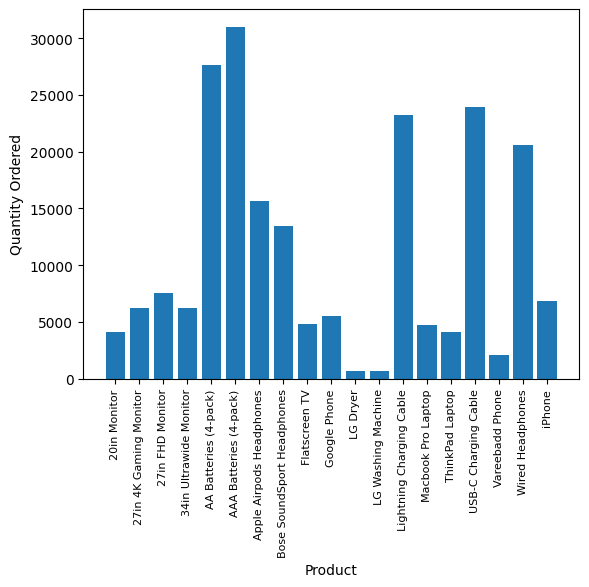

In [20]:
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

### Answer.5. Product with the Highest Sales Volume
#### AAA batteries have the highest purchase volume, primarily due to their low price and everyday utility.
#### Visualizing price alongside quantity highlights the inverse relationship between cost and demand, reinforcing how affordability drives higher sales volume.

In [21]:
prices = all_data.groupby('Product').mean(numeric_only = True)['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

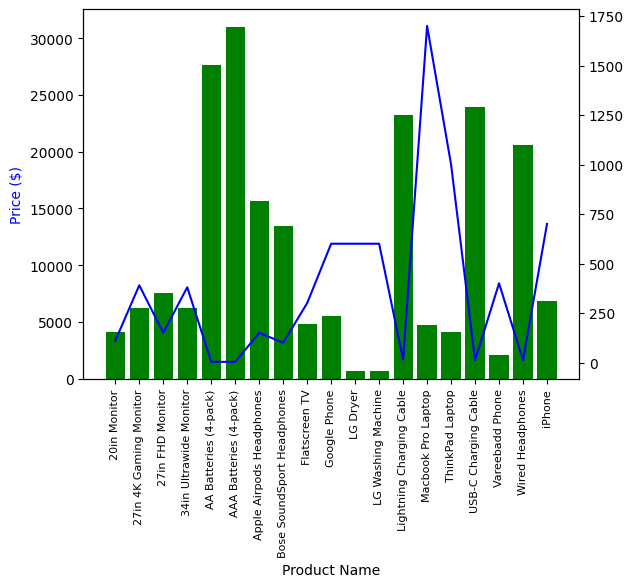

In [22]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax1.set_ylabel('Price ($)', color = 'b')
ax1.bar(products, quantity_ordered, color = 'g')
ax1.tick_params(axis='x', rotation=90, labelsize=8)


plt.show()

#### The analysis shows a clear inverse relationship between price and purchase volume, with lower-priced products such as AAA and AA batteries driving the highest sales quantities.

## 5. Key Insights & Conclusions

#### - **Sales peaked during December**, indicating strong seasonal demand driven by holiday purchases, while lower sales volumes were observed in the early months of the year.

#### - **San Francisco generated the highest total revenue**, outperforming other cities and highlighting the importance of location in sales performance.

#### - **Customer purchases were highest during the evening and early afternoon hours (around 11 AM–7 PM)**, making this time window ideal for targeted advertising campaigns.

#### - **Several products were frequently sold together**, such as phones with charging accessories, revealing clear opportunities for product bundling and cross-selling strategies.

#### - **Lower-priced products, particularly AAA and AA batteries, achieved the highest sales volumes**, demonstrating strong price sensitivity and high demand for low-cost, high-turnover items.

#### These insights provide actionable guidance for **marketing optimization, inventory planning, pricing strategy, and promotional timing** based on historical sales behavior.
